# IMDB - Binary Classification Problem

In [3]:
import keras

print (keras.__version__)

2.0.5


In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results


In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3221 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1031 - acc: 0.9692 - val_loss: 0.3045 - val_acc: 0.8848
Epoch 8/20
15000/15000 [==============================] - 2s 

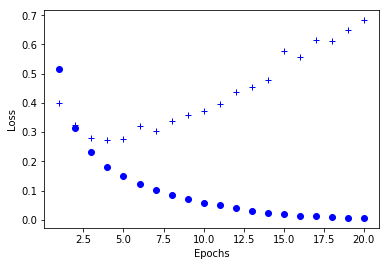

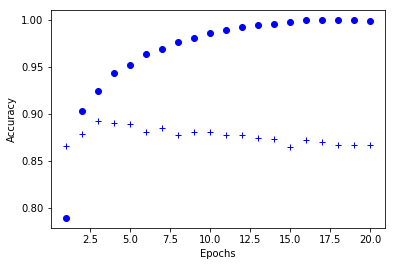

In [9]:
history_dict = history.history

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


##Overfitting after 4 epochs!

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    )
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4719 - acc: 0.8105     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2652 - acc: 0.9078     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2021 - acc: 0.9278     
Epoch 4/4
24704/25000 [============================>.] - ETA: 0s[0.29105531390190126, 0.88488]


#Conclusions:

* There’s usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it --as tensors-- into a neural network. In the case of sequence of words, they can be encoded as binary vectors --but there are other encoding options too.

* Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification) and will likely use them frequently.

* In a binary classification problem (two classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.

* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is binary_crossentropy.

* The rmsprop optimizer is generally a good enough choice of optimizer, whatever your problem. That’s one less thing for you to worry about.

* As they get better on their training data, neural networks eventually start overfitting and end up obtaining worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.